In [70]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [71]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca.csv")

#rename column 
weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices.head()

,Price
Date,
"Sep 16, 2013",4.096
"Sep 23, 2013",4.052
"Sep 30, 2013",3.980
"Oct 07, 2013",3.898
"Oct 14, 2013",3.840


In [72]:
weekly_gas_prices.index

Index(['Sep 16, 2013', 'Sep 23, 2013', 'Sep 30, 2013', 'Oct 07, 2013',
       'Oct 14, 2013', 'Oct 21, 2013', 'Oct 28, 2013', 'Nov 04, 2013',
       'Nov 11, 2013', 'Nov 18, 2013',
       ...
       'Jul 02, 2018', 'Jul 09, 2018', 'Jul 16, 2018', 'Jul 23, 2018',
       'Jul 30, 2018', 'Aug 06, 2018', 'Aug 13, 2018', 'Aug 20, 2018',
       'Aug 27, 2018', 'Sep 03, 2018'],
      dtype='object', name='Date', length=260)

In [73]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [74]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [75]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches.head()

,Tesla,isPartial
date,,
2013-09-15,14,False
2013-09-22,14,False
2013-09-29,21,False
2013-10-06,14,False
2013-10-13,13,False


In [76]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

260

In [77]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [78]:
#import Electric car Google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches.head()

,Electric car,isPartial
date,,
2013-09-15,73,False
2013-09-22,66,False
2013-09-29,69,False
2013-10-06,58,False
2013-10-13,58,False


In [79]:
#append Electric car google search popularity to a list
ecar_array = tesla_searches["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

260

In [80]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [81]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches.head()

,Prius,isPartial
date,,
2013-09-15,48,False
2013-09-22,47,False
2013-09-29,46,False
2013-10-06,48,False
2013-10-13,47,False


In [82]:
#append Prius Google search popularity to a list
prius_array = prius_searches["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

260

In [83]:
comparison_df = weekly_gas_prices.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",4.096,14,73,48
"Sep 23, 2013",4.052,14,66,47
"Sep 30, 2013",3.980,21,69,46
"Oct 07, 2013",3.898,14,58,48
"Oct 14, 2013",3.840,13,58,47


In [84]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",40.96,14,73,48
"Sep 23, 2013",40.52,14,66,47
"Sep 30, 2013",39.80,21,69,46
"Oct 07, 2013",38.98,14,58,48
"Oct 14, 2013",38.40,13,58,47


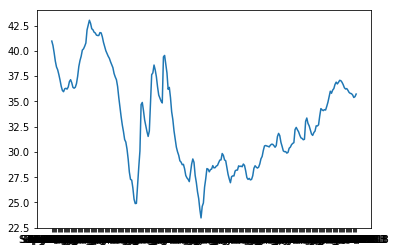

In [87]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

No handles with labels found to put in legend.


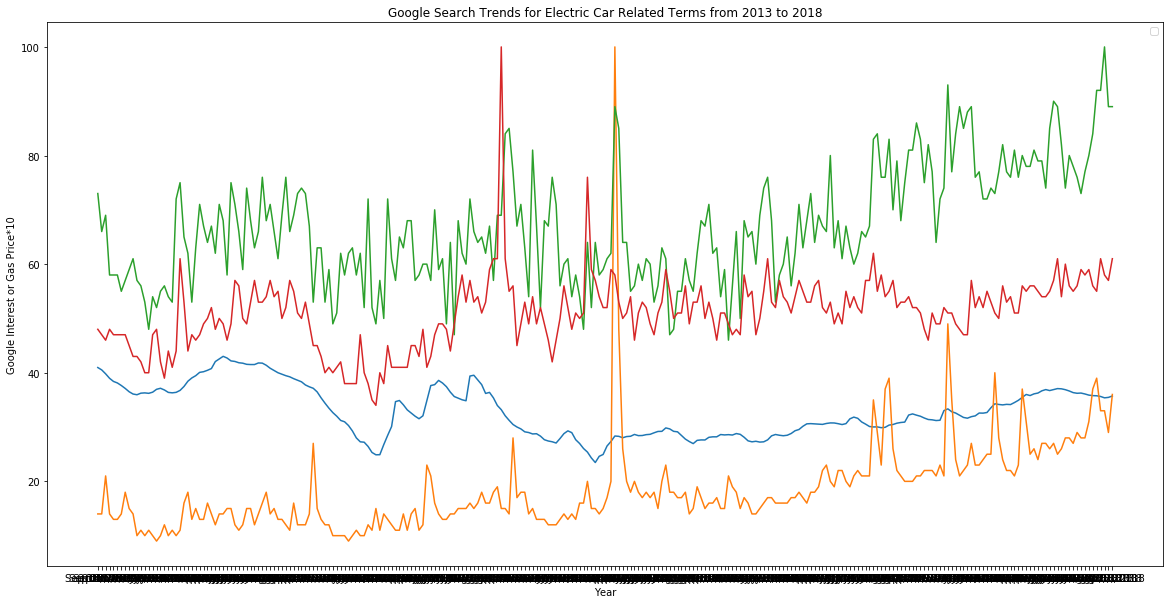

In [94]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df)
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.show()